### 11_GRU_LSTM_imdb
word_index = imdb.get_word_index()  
decode_word_map = dict([(value, key) for (key, value) in word_index.items()])  
decoded_indices = [decode_word_map.get(i-3, "?") for i in X_train[0]]  
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_words)  

In [1]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, UpSampling2D
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
top_words = 1000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=top_words)
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)
# 顯示 Numpy 陣列內容
print(X_train[0])
print(Y_train[0])   # 標籤資料

C:\Users\lucif\.conda\envs\tf20\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


X_train.shape:  (25000,)
Y_train.shape:  (25000,)
X_test.shape:  (25000,)
Y_test.shape:  (25000,)
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


C:\Users\lucif\.conda\envs\tf20\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
# 最大的單字索引值
max_index = max(max(sequence) for sequence in X_train)
print("Max Index: ", max_index)
# 建立評論文字的解碼字典
word_index = imdb.get_word_index()
we_index = word_index["we"]
print("'we' index:", we_index)
decode_word_map = dict([(value, key) for (key, value)
                                  in word_index.items()])
print(decode_word_map[we_index])
# 解碼顯示評論文字內容
decoded_indices = [decode_word_map.get(i-3, "?")
                           for i in X_train[0]]
print(decoded_indices)
decoded_review = " ".join(decoded_indices)
print(decoded_review)

Max Index:  999
'we' index: 72
we
['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', '?', '?', 'story', 'direction', '?', 'really', '?', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', '?', '?', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', '?', 'with', 'this', 'film', 'the', '?', '?', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', '?', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', '?', '?', 'was', 'amazing', 'really', '?', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', '?', 'at', 'a', 'film', 'it', 'must', 'have', 'been', 'good', 'and',

In [4]:
print("decode_word_map length:",len(decode_word_map))

decode_word_map length: 88584


In [5]:
max_words = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape:  (25000, 100)
X_test.shape:  (25000, 100)


In [8]:
# 資料預處理
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           32000     
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2048128   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [10]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=3, batch_size=128, verbose=2)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 - 10s - loss: 0.6874 - accuracy: 0.5345 - val_loss: 0.6002 - val_accuracy: 0.6964
Epoch 2/3
20000/20000 - 9s - loss: 0.4393 - accuracy: 0.8022 - val_loss: 0.4041 - val_accuracy: 0.8142
Epoch 3/3
20000/20000 - 9s - loss: 0.3442 - accuracy: 0.8518 - val_loss: 0.3990 - val_accuracy: 0.8176
測試資料集的準確度 = 0.83


In [12]:
top_words = 1000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(
                                num_words=top_words)
# 資料預處理
max_words = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

C:\Users\lucif\.conda\envs\tf20\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\lucif\.conda\envs\tf20\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               819456    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 851,713
Trainable params: 851,713
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 - 3s - loss: 0.5348 - accuracy: 0.7103 - val_loss: 0.4062 - val_accuracy: 0.8072
Epoch 2/3
20000/20000 - 2s - loss: 0.3275 - accuracy: 0.8576 - val_loss: 0.4174 - val_accuracy

In [14]:
# 定義模型
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(SimpleRNN(32))

model.summary()   # 顯示模型摘要資訊

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 定義模型
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(LSTM(32, return_sequences=True))

model.summary()   # 顯示模型摘要資訊

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100, 32)           8320      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 定義模型
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.summary()   # 顯示模型摘要資訊

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
gru_3 (GRU)                  (None, 100, 32)           6336      
_________________________________________________________________
gru_4 (GRU)                  (None, 100, 32)           6336      
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                6336      
Total params: 339,008
Trainable params: 339,008
Non-trainable params: 0
_________________________________________________________________


# SimpleRNN

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 42,785
Trainable params: 42,785
Non-trainable params: 0
__________________________________________________

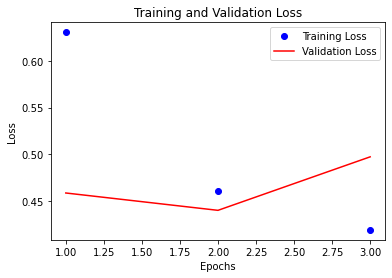

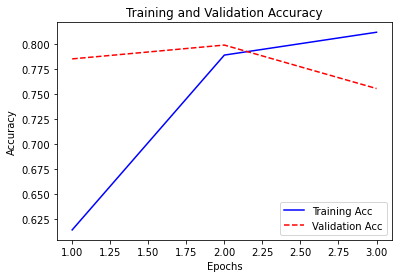

In [18]:
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.25))
model.add(SimpleRNN(32))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=128, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# LSTM

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 40,353
Trainable params: 40,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 - 13s - loss: 0.5983 - accuracy: 0.6934 - val_loss: 0.4792 - val_accuracy: 0.7852
Epoch 2/3
20000/20000 - 11s - loss: 0.4698 - accuracy: 0.7852 - val_loss: 0.4710 - val_accuracy

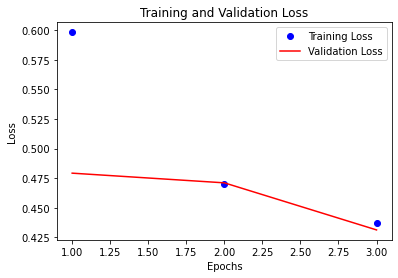

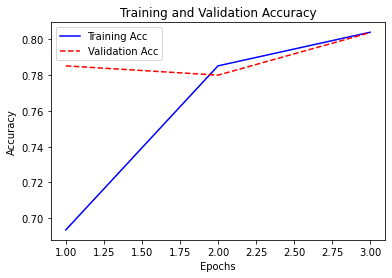

In [19]:
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.25))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# GRU

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 32)           32000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
gru_6 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 38,369
Trainable params: 38,369
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 - 14s - loss: 0.8154 - accuracy: 0.5683 - va

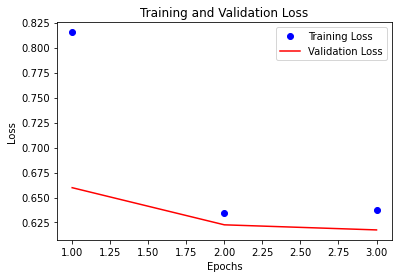

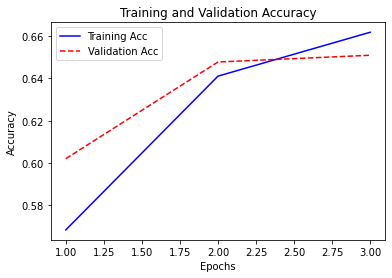

In [20]:
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.25))
model.add(GRU(32, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# 儲存模型結構和權重
#model.save("imdb_gru.h5")

# layers Conv1D

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 32)           32000     
_________________________________________________________________
dropout_9 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)               

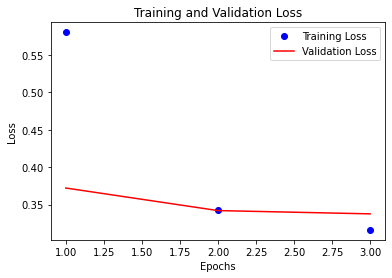

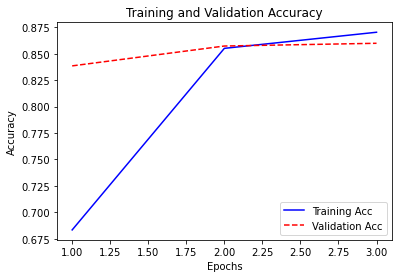

In [24]:
top_words = 1000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(
                                num_words=top_words)
# 資料預處理
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.25))
model.add(Conv1D(filters=32, kernel_size=3, padding="same",
                 activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=3, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [25]:
print("Saving Model: conv1D.h5 ...")
model.save(os.path.join(".","model_data","conv1D.h5"))

Saving Model: conv1D.h5 ...
